<a href="https://colab.research.google.com/github/ramrakhyaniRiya/Predict-Price-of-Airline-Tickets/blob/main/Copy_of_Copy_of_Predict_Price_of_Airline_Tickets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.shape

(10682, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
def change_to_datetime(a):
  df[a]=pd.to_datetime(df[a])

In [ ]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_to_datetime(i)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [ ]:
df['day']=df['Date_of_Journey'].dt.day
df['month']=df['Date_of_Journey'].dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-25 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-25 05:50:00,2022-04-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-25 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-25 18:05:00,2022-04-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-25 16:50:00,2022-04-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
df.drop('Date_of_Journey',axis= 1, inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-25 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-25 05:50:00,2022-04-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-25 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-25 18:05:00,2022-04-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-25 16:50:00,2022-04-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
def hour(d,col):
  d[col+ 'hour']=d[col].dt.hour


def min(d,col):
  d[col+ 'minute']=d[col].dt.minute

def drop_col(d,col):
  d.drop(col,axis=1,inplace= True)

In [ ]:
hour(df,'Dep_Time')
min(df,'Dep_Time')
drop_col(df,'Dep_Time')

In [ ]:
hour(df,'Arrival_Time')
min(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35




---



---



---



---



---



---



In [ ]:
duration = list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split(' '))==2:
    pass
  else:
    if 'h' in duration[i]:
        duration[i]=duration[i] + '0m'
    else:
        duration[i]='0h' + duration[i] 

In [ ]:
df['Duration']= duration 

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
'19h0m'.split(' ')[1][0:-1]

'0'

In [ ]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [ ]:
def hour(x):
  return x.split(' ')[0][0:-1] 

def minute(x):
  return x.split(' ')[-1][0:-1]

In [ ]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_minute']=df['Duration'].apply(minute)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,9,25,4,25,19h0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
drop_col(df,'Duration')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10682 non-null  object
 1   Source              10682 non-null  object
 2   Destination         10682 non-null  object
 3   Route               10682 non-null  object
 4   Total_Stops         10682 non-null  object
 5   Additional_Info     10682 non-null  object
 6   Price               10682 non-null  int64 
 7   day                 10682 non-null  int64 
 8   month               10682 non-null  int64 
 9   Dep_Timehour        10682 non-null  int64 
 10  Dep_Timeminute      10682 non-null  int64 
 11  Arrival_Timehour    10682 non-null  int64 
 12  Arrival_Timeminute  10682 non-null  int64 
 13  Duration_hours      10682 non-null  object
 14  Duration_minute     10682 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [ ]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [ ]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                  int64
day                    int64
month                  int64
Dep_Timehour           int64
Dep_Timeminute         int64
Arrival_Timehour       int64
Arrival_Timeminute     int64
Duration_hours        object
Duration_minute        int64
dtype: object



---



---



---



---



In [ ]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                  int64
day                    int64
month                  int64
Dep_Timehour           int64
Dep_Timeminute         int64
Arrival_Timehour       int64
Arrival_Timeminute     int64
Duration_hours         int64
Duration_mins          int64
dtype: object

In [ ]:
cat_col = [i for i in df.columns if df[i].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
cont_col = [i for i in df.columns if df[i].dtype!='O']
cont_col

['Price',
 'day',
 'month',
 'Dep_Timehour',
 'Dep_Timeminute',
 'Arrival_Timehour',
 'Arrival_Timeminute',
 'Duration_hours',
 'Duration_mins']

In [ ]:
categorical = df[cat_col]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info




---



---



---



In [ ]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Plot on the basis of Airline and Prices

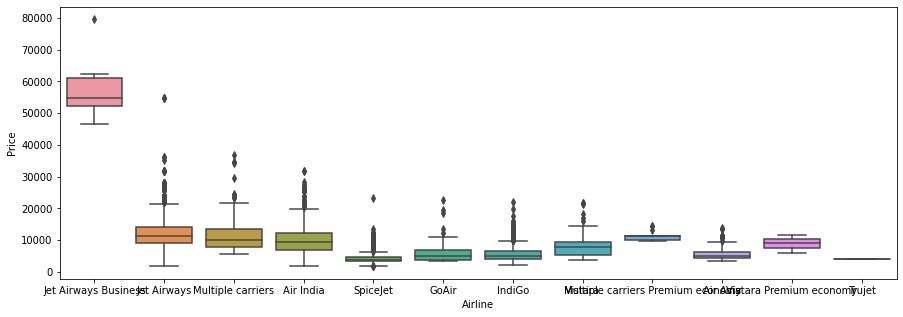

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Airline', y = 'Price',data= df.sort_values('Price',ascending = False))

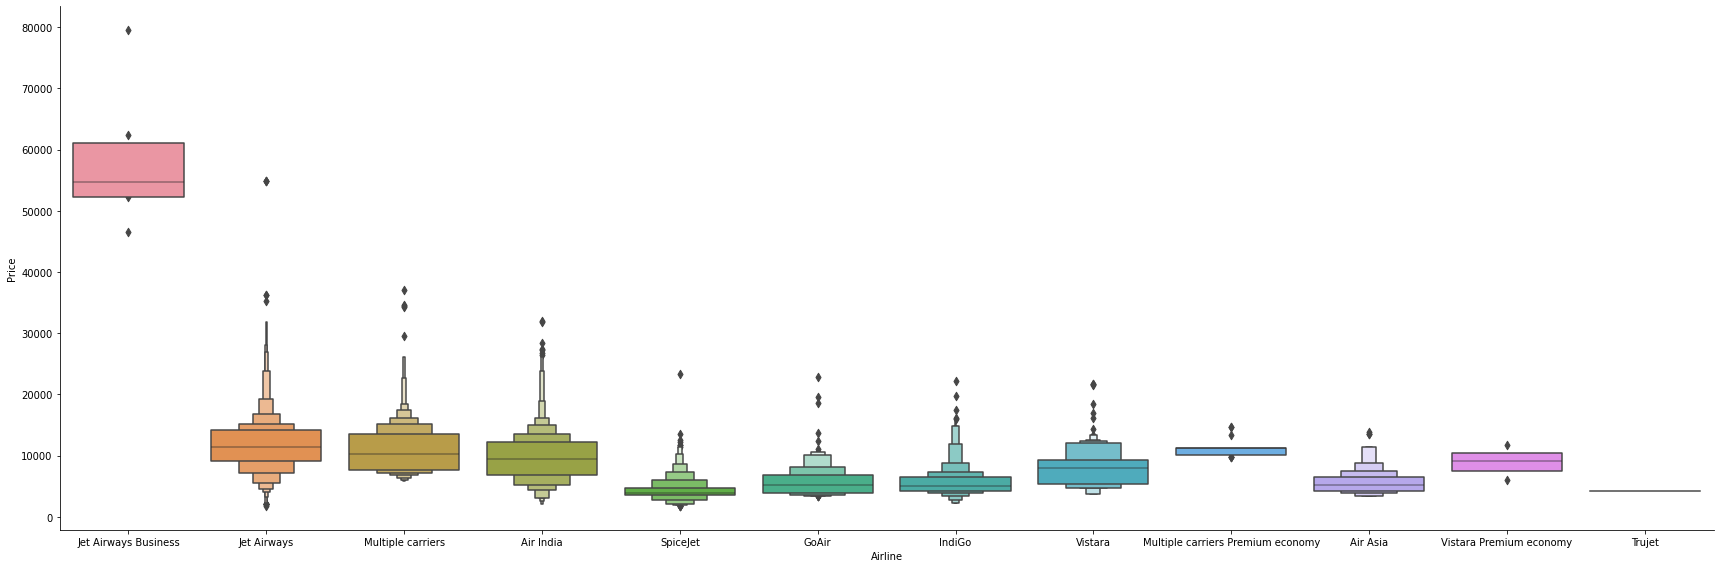

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


PLot on the bases of total stops and price

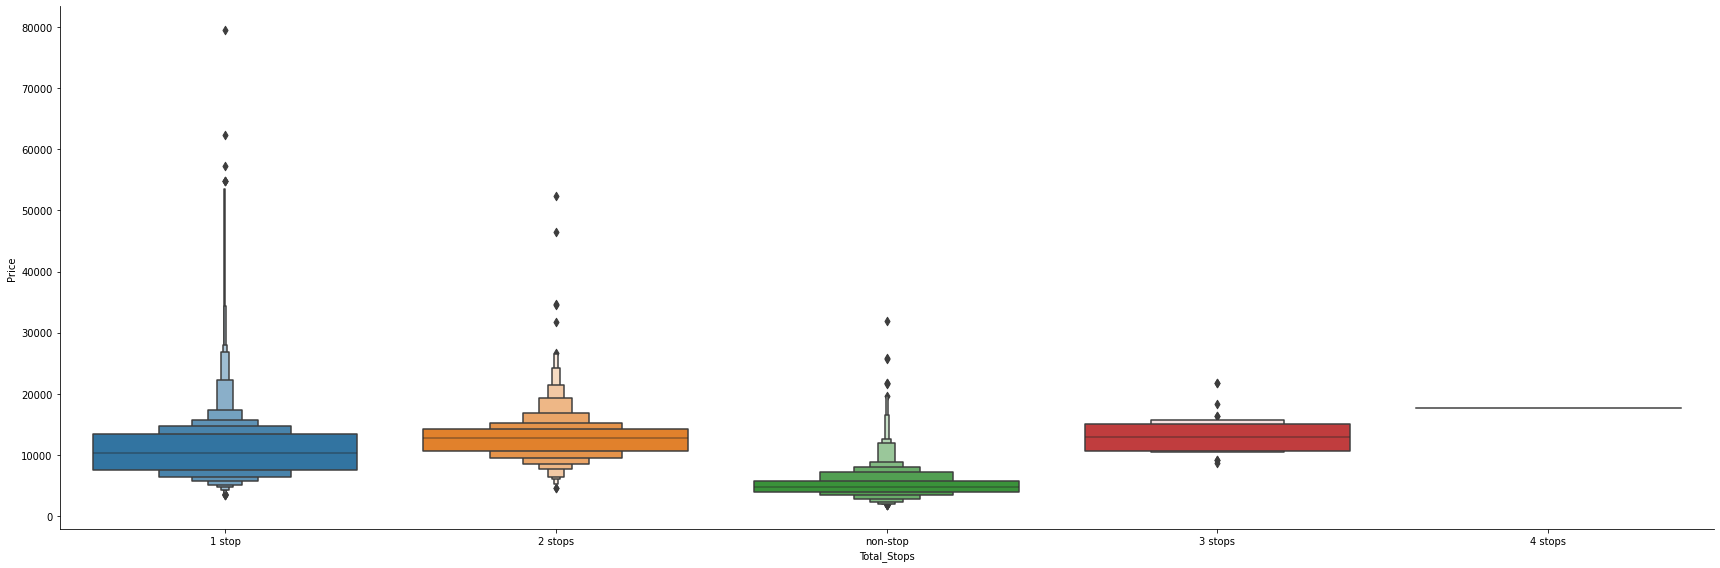

In [ ]:
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show() #point can also be used

You want to now convert Airline into integar format  because ml doesn't understand string it only understand integral format

In [ ]:
Airline = pd.get_dummies(categorical['Airline'],drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0




---



---



---



In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

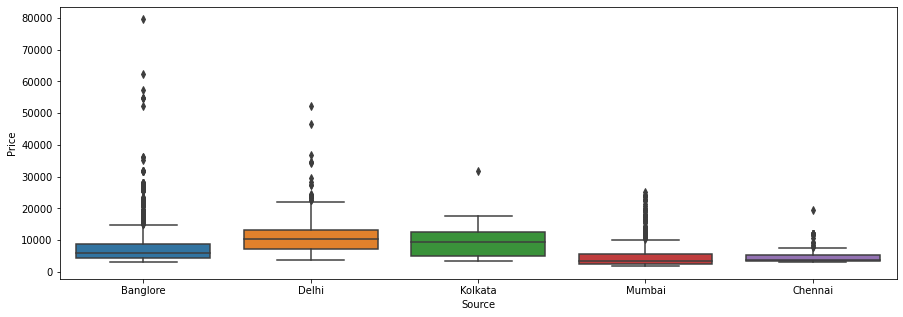

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Source', y = 'Price',data= df.sort_values('Price',ascending = False))

In [ ]:
Source = pd.get_dummies(categorical['Source'],drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0




---



---



---



In [ ]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1080x360 with 0 Axes>

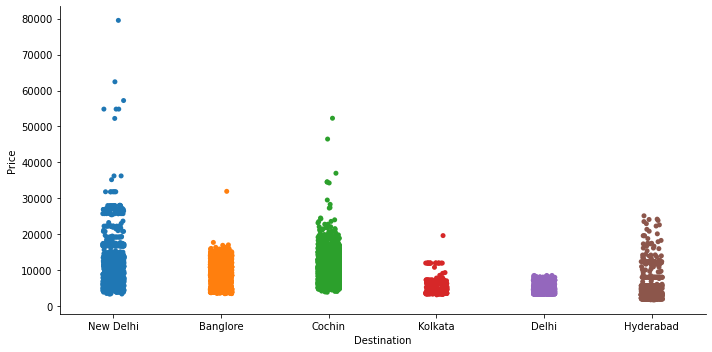

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x = 'Destination', y = 'Price',data= df ,height = 5, aspect = 2)

In [ ]:
Destination = pd.get_dummies(categorical['Destination'],drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1




---



---



In [ ]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]
categorical.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_col(categorical,'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [ ]:
for i in ['Route_3','Route_4','Route_5']:
  categorical[i].fillna('None', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [ ]:
for i in categorical.columns:
  print('{}has total {} categories'.format(i, len(categorical[i].value_counts())))

Airlinehas total 12 categories
Sourcehas total 5 categories
Destinationhas total 6 categories
Total_Stopshas total 5 categories
Additional_Infohas total 10 categories
Route_1has total 5 categories
Route_2has total 45 categories
Route_3has total 30 categories
Route_4has total 14 categories
Route_5has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
encorder = LabelEncoder()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical[i] = encorder.fit_transform(categorical[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
drop_col(categorical,'Additional_Info')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5




---



---



---



In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3 , '4 stops': 4}

In [ ]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


# Concenating Error ......Help

In [ ]:
data = pd.concat([categorical,Airline,Source,Destination,df[cont_col]],axis= 1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662.0,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882.0,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218.0,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302.0,3,1,16,50,21,35,4,45


In [ ]:
drop_col(data,'Airline')
drop_col(data,'Source')
drop_col(data,'Destination')

In [ ]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662.0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882.0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218.0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302.0,3,1,16,50,21,35,4,45


In [ ]:
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1) 
  sns.distplot(df[col],ax = ax1)
  sns.boxplot(df[col],ax = ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


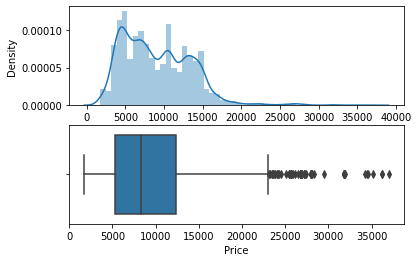

In [ ]:
plot(df,'Price')

In [ ]:
df['Price'] = np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


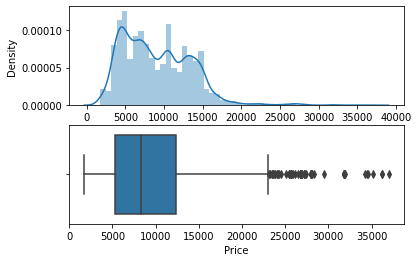

In [ ]:
plot(df,'Price')

In [ ]:
data.shape

(10682, 35)

In [ ]:
x = data.drop('Price',axis=1)
x.head() #dependent data

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,day,month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,0,1,3,1,16,50,21,35,4,45


In [ ]:
x.shape

(10682, 34)

In [ ]:
y = data['Price'] #independent data

In [ ]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

(9th Session)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(x , y)

array([2.15992576, 1.98743025, 2.79733716, 2.292109  , 1.47482531,
       0.78006441, 0.76799917, 0.10031273, 0.67861391, 0.91637272,
       0.        , 0.56521915, 0.01192911, 0.32279794, 0.        ,
       0.22579998, 0.        , 0.18505861, 1.53856421, 0.9104226 ,
       0.27009366, 1.56335321, 0.406476  , 0.30289836, 0.17269741,
       0.37508256, 1.09105931, 0.88188653, 1.43833723, 1.20836397,
       1.83592038, 1.54749356, 1.7824157 , 1.06449541])

In [ ]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)
imp

,0
Total_Stops,2.177124
Route_1,2.027382
Route_2,2.776876
Route_3,2.299542
Route_4,1.453039
Route_5,0.738071
Air India,0.747605
GoAir,0.105991
IndiGo,0.670784
Jet Airways,0.923115


Rename the Column Names

In [ ]:
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending = False)

,Importance
Route_2,2.776876
Route_3,2.299542
Total_Stops,2.177124
Route_1,2.027382
Arrival_Timehour,1.853863
Duration_hours,1.799806
Cochin,1.547896
Delhi,1.531628
Arrival_Timeminute,1.498128
Route_4,1.453039


at this time we want to apply machine learning algo to the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn import metrics

model
predictions
r2score 
mean absolute error  Mae 
mean squared error   mse 
root mean squared error  rmse 

In [ ]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(x_train , y_train)
    print('Training score: {}'.format(model.score(x_train , y_train)))

    predictions = model.predict(x_test)
    print('Predictions are:{}'.format(predictions))

    print('\n')

    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is:{}'.format(r2_score))

    print('Mae',metrics.mean_absolute_error(y_test,predictions))
    print('Mse',metrics.mean_squared_error(y_test,predictions))
    print('Mae',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test=predictions)

In [ ]:
from sklearn.ensemble import RandomForestRegressor